<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-1:-Comparing-BGI-obtained-values-for-3-samples-against-statistics-for-a-set-of-Illumina-samples-(n=320)" data-toc-modified-id="Figure-1:-Comparing-BGI-obtained-values-for-3-samples-against-statistics-for-a-set-of-Illumina-samples-(n=320)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 1: Comparing BGI obtained values for 3 samples against statistics for a set of Illumina samples (n=320)</a></span><ul class="toc-item"><li><span><a href="#Formatting-the-data-from-the-4D-genome-unit:" data-toc-modified-id="Formatting-the-data-from-the-4D-genome-unit:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Formatting the data from the 4D genome unit:</a></span></li><li><span><a href="#Read-the-data-from-the-4D-genome-unit." data-toc-modified-id="Read-the-data-from-the-4D-genome-unit.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read the data from the 4D genome unit.</a></span><ul class="toc-item"><li><span><a href="#Placing-the-sample-values-on-the-graph" data-toc-modified-id="Placing-the-sample-values-on-the-graph-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Placing the sample values on the graph</a></span></li></ul></li><li><span><a href="#Saving-tabular-data-for-Figure-1" data-toc-modified-id="Saving-tabular-data-for-Figure-1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Saving tabular data for Figure 1</a></span></li></ul></li></ul></div>

---

## Figure 1: Comparing BGI obtained values for 3 samples against statistics for a set of Illumina samples (n=320) 

### Formatting the data from the 4D genome unit:

This raw data is private and cannot be published yet. We used it with permission from the 4D Genome unit. 

For any inquiries email to: `martirenom [at] cnag [dot] crg [dot] eu`

Removing those that were not classified as INHIC (insitu HiC), and also those that had 0 reads mapped (most of them were tests & prototypes)

NOTE: **TO DO IN BASH!**

In [ ]:
cd /home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder

# check column names
head -n1 hic_juanro_dataset.tsv | sed 's/\t/\n/g' | cat -n

# Removing those that are not insitu hic, have 0 valid pairs or are test samples
cat 
<(head -n1 hic_juanro_dataset.tsv | awk -F'\t' -v OFS=$'\t' '{print $1,$45,$46,$47,$48,$67,$69,$70,$71,$72,$73,$74,$75,$76,$77,$78,$79,$98,$99}' ) \
<(awk -F'\t' -v OFS=$'\t' '$3 == "INHIC" && $99 != 0 && $1 != "TE_S_T"' hic_juanro_dataset.tsv \| 
  awk -F'\t' -v OFS=$'\t' '{print $1,$45,$46,$47,$48,$67,$69,$70,$71,$72,$73,$74,$75,$76,$77,$78,$79,$98,$99}') > hic_juanro_dataset_f1.tsv

wc -l hic_juanro_dataset_f1.tsv

**Now run the analysis in R:**

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(reshape2)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




### Read the data from the 4D genome unit. 

In [2]:
a=read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/hic_juanro_dataset_f1.tsv",
             header=TRUE,
             stringsAsFactors = FALSE)

In [3]:
#summary(a)
dim(a)

[1] 320  19

In [4]:
# select only those columns to compute the percentages.
chunk=a[,8:17]
head(chunk)
# compute valid pairs
valids=a[,19]/a[,18]
# change character for double
percs=as.data.frame(lapply(a[,2:5],as.double))
# compute percentage over 1
percs=percs/100

,EXCLUDED_SELF_CIRCLE,EXCLUDED_DANGLING_END,EXCLUDED_ERROR,EXCLUDED_EXTRA_DANGLING_END,EXCLUDED_TOO_CLOSE_FROM_RES,EXCLUDED_TOO_SHORT,EXCLUDED_TOO_LARGE,EXCLUDED_OVER_REPRESENTED,EXCLUDED_DUPLICATED,EXCLUDED_RANDOM_BREAKS
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,180727;0.0008181000356266231,13964364;0.06321272795931505,86353;0.00039089561812272536,34461646;0.15599812878182048,71165405;0.32214566924633875,13074145;0.05918295822034138,27994;0.0001267209238095674,9420193;0.04264255052598486,8891413;0.04024891295750507,123792;0.0005603713867340847
2,176738;0.0008162783164235938,17665621;0.08159005628929424,33312;0.00015385408501116204,38540540;0.17800250713064636,55525632;0.2564494868523805,10077260;0.04654261577568392,34522;0.00015944256492421159,11475967;0.05300265377051183,15688726;0.07245961166308923,158380;0.0007314904534122191
3,110767;0.0007128736641671585,12852246;0.08271441583502041,718378;0.004623333277213204,39532601;0.25442370136347714,72535121;0.4668211424709363,11660154;0.07504235653880081,24329;0.0001565764476380402,9008993;0.05798002880249787,18836436;0.12122743372277099,145135;0.0009340590541307478
4,294303;0.0013325714223721011,12517567;0.056678158434769865,231953;0.0010502575207642327,46079136;0.20864122962116421,74787736;0.338630594107125,11548820;0.05229177920075354,49365;0.00022351925826579673,13857740;0.06274631350228425,36123427;0.1635628807669129,265574;0.0012024896889431926
5,176931;0.0008646272499276631,27806915;0.13588696410138576,1399862;0.006840852260701846,43149998;0.21086561487316616,84818738;0.41449261112679503,12416541;0.06067721144651913,44783;0.00021884577679157714,10745709;0.05251218170469244,54506386;0.2663620656113156,1193757;0.005833657369211146
6,119490;0.0007923299385199313,29990011;0.1988616919561642,544565;0.0036109729096167574,39737860;0.2634990055294471,61974834;0.4109508445309477,9770407;0.06478689411352169,35375;0.00023456918215032695,8266866;0.054817017570780065,32920930;0.21829641344814596,845282;0.00560500657035739


Warning message in lapply(a[, 2:5], as.double):
“NAs introduced by coercion”
Warning message in lapply(a[, 2:5], as.double):
“NAs introduced by coercion”
Warning message in lapply(a[, 2:5], as.double):
“NAs introduced by coercion”
Warning message in lapply(a[, 2:5], as.double):
“NAs introduced by coercion”


In [5]:
# Split the columns and create a new column besides each filter class with the percentage reported there
for (i in seq(1,dim(chunk)[2],1)){
    ca=data.frame(chunk[,i],stringsAsFactors = FALSE)
    cn=colnames(chunk)[i]
    colnames(ca)=cn
    caca=ca %>% separate(colnames(chunk)[i], c(cn, paste0(cn,"_perc")),sep=";")
    px=as.data.frame(caca[,2],stringsAsFactors = FALSE)
    colnames(px)=paste0(cn,"_perc")
    percs=cbind(percs,lapply(px,as.numeric))
}

In [6]:
# add valid pairs
percs$valid_pairs=valids

In [7]:
# column names formatting
colnames(percs)=c("dangling ends r1","ligated r1","dangling ends r2","ligated r2","self circle","dangling ends","error","extra dangling", "too close from res", "too short", "too large", "overrepresented","duplicated", "random breaks","valid pairs")

In [8]:
# How many we have
dim(percs)

[1] 320  15

In [9]:
# use only those rows with full info (remove rows with NA's)
percs=percs[complete.cases(percs), ]
# After removing NA's (4 cases)
dim(percs)
head(percs)

[1] 316  15

,dangling ends r1,ligated r1,dangling ends r2,ligated r2,self circle,dangling ends,error,extra dangling,too close from res,too short,too large,overrepresented,duplicated,random breaks,valid pairs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.07331,0.23132,0.08017,0.23060,0.0008181000,0.06321273,0.0003908956,0.1559981,0.3221457,0.05918296,0.0001267209,0.04264255,0.04024891,0.0005603714,0.8864393
2,0.03291,0.25579,0.03056,0.26364,0.0008162783,0.08159006,0.0001538541,0.1780025,0.2564495,0.04654262,0.0001594426,0.05300265,0.07245961,0.0007314905,0.8284620
3,0.06644,0.27054,0.06821,0.26698,0.0007128737,0.08271442,0.0046233333,0.2544237,0.4668211,0.07504236,0.0001565764,0.05798003,0.12122743,0.0009340591,0.7867297
4,0.02121,0.25370,0.02163,0.25563,0.0013325714,0.05667816,0.0010502575,0.2086412,0.3386306,0.05229178,0.0002235193,0.06274631,0.16356288,0.0012024897,0.8000160
5,0.07891,0.21146,0.08121,0.20882,0.0008646272,0.13588696,0.0068408523,0.2108656,0.4144926,0.06067721,0.0002188458,0.05251218,0.26636207,0.0058336574,0.6612235
6,0.03578,0.27713,0.03734,0.26850,0.0007923299,0.19886169,0.0036109729,0.2634990,0.4109508,0.06478689,0.0002345692,0.05481702,0.21829641,0.0056050066,0.6483567


#### Placing the sample values on the graph

In [ ]:
# In bash; for each sample (workdir):
cd ${wd};
# Get the values for the errors in sample
tadbit describe . | grep -A 4 "INTERSECTION_OUTPUTs" | tail -n1 | cut -d$'|' -f4 | sed 's/,//g' | awk '{print $1}' > tots;
# Get the total number of interactions
tadbit describe . | grep -A 14 "FILTER_OUTPUTs" | tail -n11 | cut -d$'|' -f5  | sed 's/,//g' | awk '{print $1}' > nums
# Get the dangling ends and ligated sites
tadbit describe . | grep -A6 'MAPPED_INPUTs' | tail -n4 | cut -d$'|' -f9,10 | grep -Eo '[0-9\.]*' | sed -e 1,3b -e '$!d' > dangs_lig

In [10]:
# disable scientific notation
options(scipen=999)

# enable again
#options(scipen=0)

In [11]:
# In R, read both files for all
vals10=read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/10_Zebra_finch_Oz13/nums")
total10=as.numeric(read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/10_Zebra_finch_Oz13/tots"))
dangs_lig10=read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/10_Zebra_finch_Oz13/dangs_lig")

vals18=read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/18_Zebra_finch_Mz13/nums")
total18=as.numeric(read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/18_Zebra_finch_Mz13/tots"))
dangs_lig18=read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/18_Zebra_finch_Mz13/dangs_lig")

vals19=read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/19_Zebra_finch_Mz17/nums")
total19=as.numeric(read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/19_Zebra_finch_Mz17/tots"))
dangs_lig19=read.table("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/19_Zebra_finch_Mz17/dangs_lig")

vals10=vals10/total10
vals10=bind_rows(dangs_lig10/100,vals10)
rownames(vals10)=colnames(percs)

vals18=vals18/total18
vals18=bind_rows(dangs_lig18/100,vals18)
rownames(vals18)=colnames(percs)

vals19=vals19/total19
vals19=bind_rows(dangs_lig19/100,vals19)
rownames(vals19)=colnames(percs)

In [12]:
# Merge all samples
colnames(vals10)=c("value")
colnames(vals18)=c("value")
colnames(vals19)=c("value")

a10=melt(vals10)
a18=melt(vals18)
a19=melt(vals19)

a10$variable=as.factor(colnames(percs))
a10$Sample="Oz13"
a18$variable=as.factor(colnames(percs))
a18$Sample="Mz13"
a19$variable=as.factor(colnames(percs))
a19$Sample="Mz17"

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables



In [13]:
all=bind_rows(a10,a18,a19)

all$Sample=as.factor(all$Sample)

In [14]:
all

variable,value,Sample
<fct>,<dbl>,<fct>
dangling ends r1,0.030000000000,Oz13
ligated r1,0.316010000000,Oz13
dangling ends r2,0.030000000000,Oz13
ligated r2,0.298200000000,Oz13
self circle,0.000623176006,Oz13
dangling ends,0.332374768033,Oz13
error,0.000489399795,Oz13
extra dangling,0.288776641185,Oz13
too close from res,0.292769182340,Oz13


### Saving tabular data for Figure 1

In [19]:
# Background data
write.table(percs,"/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/Figure1_background_data_316_samples.tsv",
            sep="\t",row.names=FALSE, quote=FALSE)
# Observed 3 points data.
write.table(all,"/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/Figure1_points_3_samples_data.tsv",
            sep="\t",row.names=FALSE, quote=FALSE)

adding...

No id variables; using all as measure variables



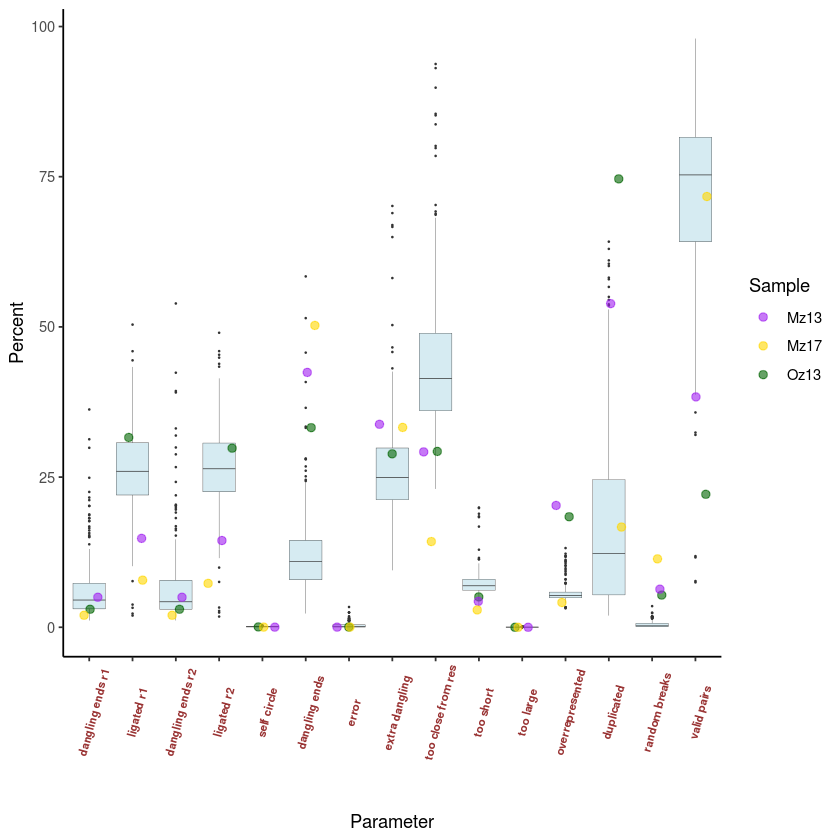

In [64]:
a=ggplot(data = melt(percs),
           aes(x=variable, y=value*100)) + 
geom_boxplot(aes(fill=variable),
             fill=alpha('lightblue',0.5),
             outlier.size = 0.1,
             lwd=0.1) + 
theme_classic() +

geom_jitter(data=all,aes(color=Sample),alpha=0.6,size=2,width = 0.3) +
xlab("Parameter") +
scale_color_manual(values = c("purple","gold","darkgreen")) +
ylab("Percent") +
theme(legend.position="right",
      axis.text.x = element_text(angle = 75, 
                                 face = "bold", 
                                 color = "#993333", 
                                 size = 7,
                                 margin = margin(t = 30))) # top margin



In [65]:
pdf("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/response_referees//illumina_4DGenome_comparison.pdf")
a
dev.off()

png 
  2

**END**